## Task 1 : Prediction using Supervised ML

### Linear Regression with Python Scikit Learn

In [1]:
## importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
## Reading data
data=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Exploratory data analysis 

In [3]:
## Extract columns 
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [4]:
## To find number of dimensions
data.shape

(25, 2)

In [5]:
## To get summary of a DataFrame. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
##calculating some statistical data like percentile, mean, std, count, max and min of the DataFrame.
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Data visualization

In [7]:
# features

x=data['Hours']
y=data['Scores']

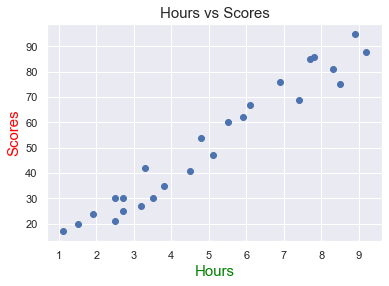

In [8]:
#plot 
plt.scatter(x,y)
plt.title('Hours vs Scores',fontsize = 15)
plt.xlabel("Hours",fontsize = 15,color='Green')
plt.ylabel("Scores",fontsize = 15,color='Red')
plt.show()

In [9]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


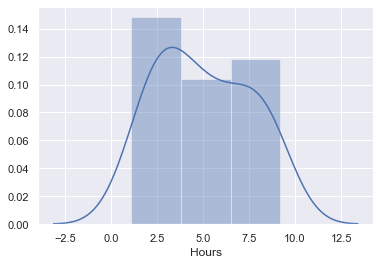

In [10]:
sns.distplot(data["Hours"])# to dectect outliers

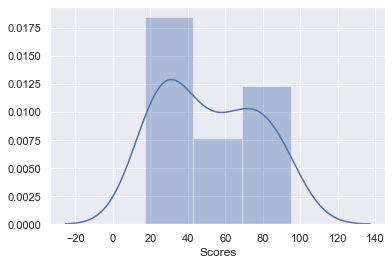

In [11]:
sns.distplot(data["Scores"])# to dectect outliers

### Preparing the data

In [12]:
# input
x = data.iloc[:,:-1].values  

#Output  
y = data.iloc[:,1].values

In [13]:
# Divide data into train and test
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0)

### Fit Linear Regression using test data

In [14]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Results

In [15]:
## To get Adjusted R-square
r2=reg.score(x_train,y_train)
n=x_train.shape[0]

p=x_train.shape[1]

adj_r=1-(1-r2)*(n-1)/(n-p-1)
adj_r

0.9488594654389974

#####  Fitted Regression model 
$\hat{y}= b_{0}+b_{1}x$

In [16]:
result=pd.DataFrame({"Values":[ reg.coef_,reg.intercept_,reg.score(x_train,y_train),adj_r],"Feature":['Hours','','','']})

result.rename(index={0:"coefficient",1:"Intercept",2:"R-squared",3:"Adjusted R-squared"})

,Values,Feature
coefficient,[9.910656480642237],Hours
Intercept,2.01816,
R-squared,0.951551,
Adjusted R-squared,0.948859,


### Plotting regression line 

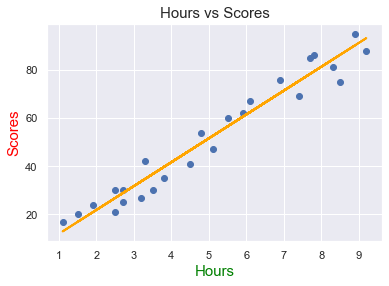

In [17]:
plt.scatter(x,y)
yhat=reg.coef_*x+reg.intercept_
plt.title('Hours vs Scores',fontsize = 15)
fig=plt.plot(x,yhat,lw=2,c="Orange")
plt.xlabel("Hours",fontsize = 15,color='Green')
plt.ylabel("Scores",fontsize = 15,color='Red')
plt.show()

### To make predictions

In [18]:
print(x_test) # Testing data - In Hours
y_predicted = reg.predict(x_test) # Predicting the scores
prediction_summary = pd.DataFrame({'Actual': y_test, 'Predicted': y_predicted})  
prediction_summary

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Predicted score if a student studies for 9.25 hrs/ day?

In [19]:
x=pd.DataFrame([9.25])
pre= reg.predict(x)
pre

array([93.69173249])

In [20]:
summary = pd.DataFrame({'Hours':9.25, 'Predicted Score': pre})  
summary
summary.rename(index={0:''})

,Hours,Predicted Score
,9.25,93.691732


### Performance of regression model

In [21]:
# calculate Residuals 
prediction_summary['Residuals']=prediction_summary['Actual']-prediction_summary['Predicted']
prediction_summary

,Actual,Predicted,Residuals
0,20,16.884145,3.115855
1,27,33.732261,-6.732261
2,69,75.357018,-6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


In [22]:
# Mean Absolute error
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_predicted))

4.183859899002975
